In [18]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [19]:
# Load data
df = pd.read_csv("Job_Placement_Data_Enhanced.csv")

In [20]:
# Define features and target
X = df.drop("status", axis=1)
y = df["status"]

In [21]:
# Separate categorical and numerical columns
categorical_cols = X.select_dtypes(include='object').columns
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns

In [22]:
# Preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), numerical_cols),
        ("cat", OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ]
)

In [23]:
# Create pipeline
model = Pipeline(steps=[
    ("preprocessing", preprocessor),
    ("classifier", LogisticRegression(max_iter=1000))
])

In [24]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [25]:
# Train model
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

In [26]:
# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.8604651162790697

Classification Report:
               precision    recall  f1-score   support

  Not Placed       0.75      0.75      0.75        12
      Placed       0.90      0.90      0.90        31

    accuracy                           0.86        43
   macro avg       0.83      0.83      0.83        43
weighted avg       0.86      0.86      0.86        43


Confusion Matrix:
 [[ 9  3]
 [ 3 28]]


# Model Evaluation Metrics

In [27]:
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
    classification_report,
    roc_auc_score,
    roc_curve
)
import matplotlib.pyplot as plt

# Predictions
y_pred = model.predict(X_test)

# If binary classification, get probabilities
y_prob = model.predict_proba(X_test)[:, 1]

In [28]:
# 1️ Accuracy

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8604651162790697


In [29]:
# 2️ Precision

precision = precision_score(y_test, y_pred, pos_label="Placed")
print("Precision:", precision)

Precision: 0.9032258064516129


In [30]:
# 3️ Recall

recall = recall_score(y_test, y_pred, pos_label="Placed")
print("Recall:", recall)

Recall: 0.9032258064516129


In [31]:
# 4️ F1 Score

f1 = f1_score(y_test, y_pred, pos_label="Placed")
print("F1 Score:", f1)

F1 Score: 0.9032258064516129


In [32]:
# 5️ Confusion Matrix

cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:\n", cm)


Confusion Matrix:
 [[ 9  3]
 [ 3 28]]


In [33]:
# 6️ ROC-AUC Score

roc_auc = roc_auc_score(y_test.map({"Not Placed":0, "Placed":1}), y_prob)
print("ROC-AUC Score:", roc_auc)

ROC-AUC Score: 0.9327956989247311


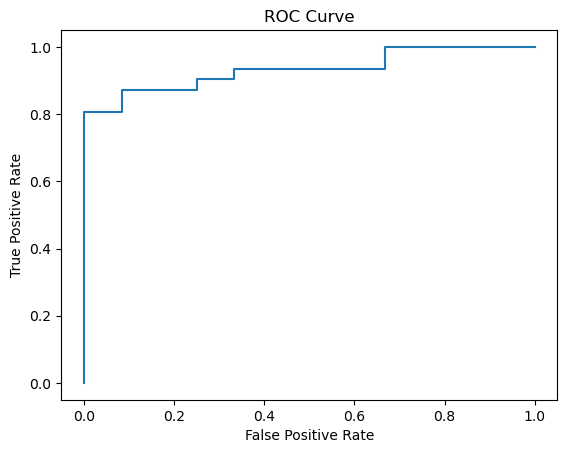

In [34]:
# 7️ ROC Curve

fpr, tpr, thresholds = roc_curve(
    y_test.map({"Not Placed":0, "Placed":1}), y_prob
)

plt.figure()
plt.plot(fpr, tpr)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.show()